# Data Visualization

In [11]:
# Importing the Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
#United States Greenhouse Gas Emissions
#Reading data from CSV and creating a Pandas Data Frame
US_Gas_data ="data/GH_Em_byGas.csv"
US_Gas_emission = pd.read_csv(US_Gas_data)

In [3]:
#Dropping columns and rows that are not needed
US_Gas_emission_New = US_Gas_emission.drop(columns=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])
US_Gas_emission_New = US_Gas_emission_New.drop([4,5,6])
US_Gas_emission_New

,"U.S. Emissions by Gas, MMT CO2 eq.",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Carbon dioxide,5679.715249,5546.116067,5344.085980,5480.156537,5528.681067,5376.473125,5252.932175,5212.162345,5377.797353,5262.145074,4714.628032,5032.212819
1,Methane,860.381779,839.346840,828.343395,832.018487,825.284949,838.330206,799.318085,822.724448,831.387917,824.663669,807.664701,793.415207
2,Nitrous oxide,415.414114,419.077150,399.153659,430.717412,434.959339,432.652386,414.527389,422.939997,437.226128,417.587789,399.853364,405.122493
3,Fluorinated gases,159.032287,165.219394,162.741420,163.039500,167.613517,170.275887,170.558371,172.317566,172.791340,177.699752,180.193612,187.291710


###### US Greenhouse Gas Emissions (2010 - 2021) - Stacked Chart

<Figure size 864x648 with 0 Axes>

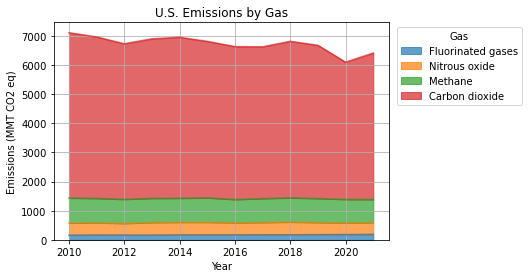

In [4]:
Stacked_area = US_Gas_emission_New
Stacked_area.set_index('U.S. Emissions by Gas, MMT CO2 eq.', inplace=True)
# Reverse the rows in the DataFrame
Stacked_area =Stacked_area[::-1]
# Plotting the stacked area chart
plt.figure(figsize=(12,9 ))

Stacked_area.T.plot(kind='area', stacked=True, alpha=0.7)
plt.title('U.S. Emissions by Gas')
plt.xlabel('Year')
plt.ylabel('Emissions (MMT CO2 eq)')
plt.legend(title='Gas', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
#plt.tight_layout()
# Save the figure
plt.savefig("output_data/Stacked_US_GHG_Emissions.png",dpi=300, bbox_inches='tight')

#Show plot
plt.show()

#### US Greenhouse Gas Emissions (2010 - 2021)

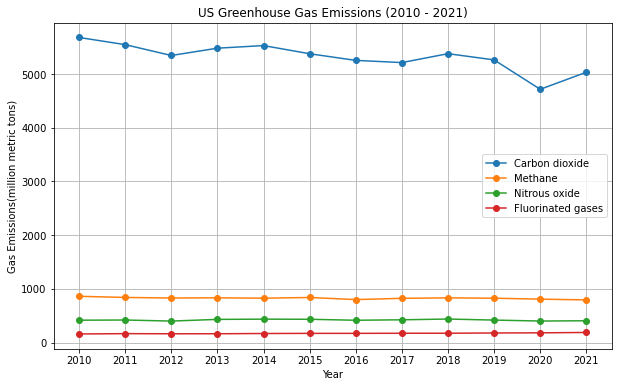

In [7]:
# Set US Emissions by Gas Column as index and plot the trend over the years
US_Gas_emission_New.set_index('U.S. Emissions by Gas, MMT CO2 eq.', inplace=True)
plt.figure(figsize=(10, 6))
for gas in US_Gas_emission_New.index:
    plt.plot(US_Gas_emission_New.columns, US_Gas_emission_New.loc[gas], marker='o', label=gas)

plt.title('US Greenhouse Gas Emissions (2010 - 2021)')
plt.xlabel('Year')
plt.ylabel('Gas Emissions(million metric tons)')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/US_GHG_Emissions.png")

#Show plot
plt.show()

In [5]:
# Calculating the average emissions for each gas
US_Gas_Avg = US_Gas_emission_New
US_Gas_Avg['Average US. Emissions'] = US_Gas_Avg.iloc[:, 1:].mean(axis=1)

# Displaying the new DataFrame
US_Gas_Avg.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average US. Emissions
"U.S. Emissions by Gas, MMT CO2 eq.",,,,,,,,,,,,,
Carbon dioxide,5679.715249,5546.116067,5344.085980,5480.156537,5528.681067,5376.473125,5252.932175,5212.162345,5377.797353,5262.145074,4714.628032,5032.212819,5284.308234
Methane,860.381779,839.346840,828.343395,832.018487,825.284949,838.330206,799.318085,822.724448,831.387917,824.663669,807.664701,793.415207,822.045264
Nitrous oxide,415.414114,419.077150,399.153659,430.717412,434.959339,432.652386,414.527389,422.939997,437.226128,417.587789,399.853364,405.122493,419.437919
Fluorinated gases,159.032287,165.219394,162.741420,163.039500,167.613517,170.275887,170.558371,172.317566,172.791340,177.699752,180.193612,187.291710,171.794734


#### US Co2 Emissions by Sector(2010-2021)

In [6]:
#United States Co2 Emissions across sectors
US_Sector_data ="data/GH_Em_bySector.csv"
US_Sector_emission = pd.read_csv(US_Sector_data)
US_Sector_emission= US_Sector_emission.drop([6,7])
US_Sector_emission = US_Sector_emission.drop(columns=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])
US_Sector_emission.head(10)

,"U.S. Emissions by Economic Sector, MMT CO2 eq.",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Transportation,1795.175731,1762.312341,1743.453676,1746.588318,1780.757323,1789.136009,1824.096783,1841.552042,1871.294023,1874.274488,1624.943271,1804.305300
1,Electric power industry,2312.771663,2209.959692,2072.405237,2090.722839,2090.858894,1951.461321,1859.182790,1779.214668,1799.127812,1650.495333,1481.835903,1584.081810
2,Industry,1488.580465,1494.923265,1485.523423,1544.374775,1530.641039,1518.109918,1463.052915,1494.544914,1558.002166,1568.208895,1465.430495,1487.265693
3,Agriculture,639.149456,630.736031,622.239249,644.877800,650.515076,647.454217,643.250875,654.241864,670.620627,655.439133,637.186836,635.761357
4,Commercial,430.838755,425.491762,406.441434,429.237535,439.387874,451.668363,435.494596,437.630681,453.705980,461.955049,436.025249,439.156690
5,Residential,355.227222,348.614210,306.222705,356.926235,377.273304,350.199226,326.394589,328.360945,375.821421,382.394713,356.939570,365.554046


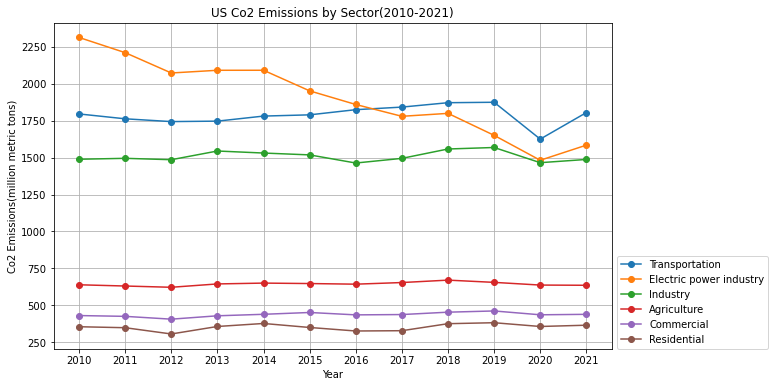

In [34]:
#Sector Wise emission trend from 2010-2021
# Set US Emissions by Sector Column as index
US_Sector_emission.set_index('U.S. Emissions by Economic Sector, MMT CO2 eq.', inplace=True)
#Choose Specific years for plotting 
years_plot= ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
selected_years_plot= US_Sector_emission[years_plot]
plt.figure(figsize=(10, 6))
for sector in selected_years_plot.index:
    plt.plot(selected_years_plot.columns, selected_years_plot.loc[sector], marker='o', label=sector)

plt.title('US Co2 Emissions by Sector(2010-2021)')
plt.xlabel('Year')
plt.ylabel('Co2 Emissions(million metric tons)')
plt.legend(loc=(1.01,0))
plt.grid(True)

# Save the figure
plt.savefig("output_data/US_Co2_Emissions_Sector.png",dpi=300, bbox_inches='tight')

#Show plot
plt.show()

#### Co2 Emissions for States in US

In [12]:
# State wise Co2 Emissions data files
Co2_data = "data/Statelevel_co2_year_mod.xlsx"
#Statewise_Co2 = "data/Study_results.csv"

In [13]:
# Read the Co2 emissions data and the Statewise Co2
Co2_emission = pd.read_excel(Co2_data)
Co2_emission.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,106.254617,98.431803,108.392103
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,34.276830,35.977743,38.872526
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,92.555687,80.153897,83.024267
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,65.073337,54.749619,62.024941
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,358.266355,303.815453,324.039053


In [14]:
# Calculating the average CO2 emissions for each state
State_Co2_Average = Co2_emission
#State_Co2_Average.set_index('State', inplace=True)
State_Co2_Average['Average CO2 Emissions'] = State_Co2_Average.iloc[:, 1:].mean(axis=1)
# Displaying the new DataFrame
State_Co2_Average.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average CO2 Emissions
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,106.254617,98.431803,108.392103,116.248499
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,34.276830,35.977743,38.872526,35.346155
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,92.555687,80.153897,83.024267,92.947092
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,65.073337,54.749619,62.024941,64.603763
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,358.266355,303.815453,324.039053,345.762481


In [13]:
State_Co2_Average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  51 non-null     object 
 1   2010                   51 non-null     float64
 2   2011                   51 non-null     float64
 3   2012                   51 non-null     float64
 4   2013                   51 non-null     float64
 5   2014                   51 non-null     float64
 6   2015                   51 non-null     float64
 7   2016                   51 non-null     float64
 8   2017                   51 non-null     float64
 9   2018                   51 non-null     float64
 10  2019                   51 non-null     float64
 11  2020                   51 non-null     float64
 12  2021                   51 non-null     float64
 13  Average CO2 Emissions  51 non-null     float64
dtypes: float64(13), object(1)
memory usage: 5.7+ KB


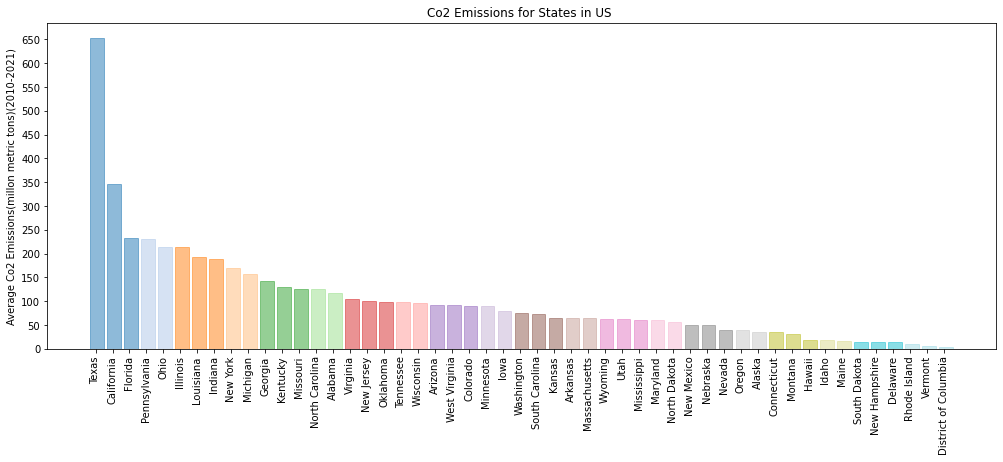

In [10]:
# Set x axis and tick locations
x_axis = np.arange(len(State_Co2_Average))
tick_locations = [value+0.3 for value in x_axis]
New_states_average= State_Co2_Average.sort_values(by='Average CO2 Emissions', ascending=False)
#New_states_average = State_Co2_Average[['Average CO2 Emissions']]
New_states_average.reset_index(inplace=True)
plt.figure(figsize=(17,6))
# Creating a list of different color shades
color_list = plt.cm.get_cmap('tab20', len(State_Co2_Average))
bars= plt.bar(x_axis, New_states_average["Average CO2 Emissions"], color='r', alpha=0.5, align="edge")
# Applying different color shades to each bar
for i, bar in enumerate(bars):
    bar.set_color(color_list(i))
plt.xticks(tick_locations, New_states_average["State"], rotation="vertical")
plt.yticks(range(0,700,50))
plt.title("Co2 Emissions for States in US ")
plt.ylabel("Average Co2 Emissions(millon metric tons)(2010-2021)")
# Save the figure
plt.savefig("output_data/Co2_Emissions_States_US.png",dpi=300, bbox_inches='tight')

#Show plot
plt.show()

#### Co2 Emissions - National Average Vs Average of Top 5 States 

In [15]:
average_allstates= State_Co2_Average["Average CO2 Emissions"].mean()
avg_state_Co2 = pd.DataFrame({'National': ['US'], 'Average_total': [average_allstates]})
avg_state_Co2.head()

,National,Average_total
0,US,102.279655


In [16]:
Sort_State_Co2_Average= State_Co2_Average
# Sort the DataFrame by 'Average CO2 Emissions' in descending order and select the top 5 states
top_5_states_total = Sort_State_Co2_Average.sort_values(by='Average CO2 Emissions', ascending=False).head(5)

# Display the top 5 states with the highest average emissions
top_5_states_total.head(10)

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average CO2 Emissions
43,Texas,615.543957,635.041655,627.109709,657.830179,661.990468,655.258602,656.870948,665.085545,684.814849,683.415250,624.681653,663.458164,652.591748
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,358.266355,303.815453,324.039053,345.762481
9,Florida,245.461308,232.428570,226.974379,226.983070,233.032277,237.387044,238.837494,238.436599,242.017702,233.617789,207.727250,226.324207,232.435641
38,Pennsylvania,256.095685,249.745538,239.770065,249.522470,249.386300,232.933387,217.986066,215.300085,220.204268,218.757992,193.265772,213.509723,229.706446
35,Ohio,247.181214,235.115652,214.913592,228.025907,229.722241,211.201417,205.328435,205.064750,208.971154,196.699285,185.664161,194.036986,213.493733


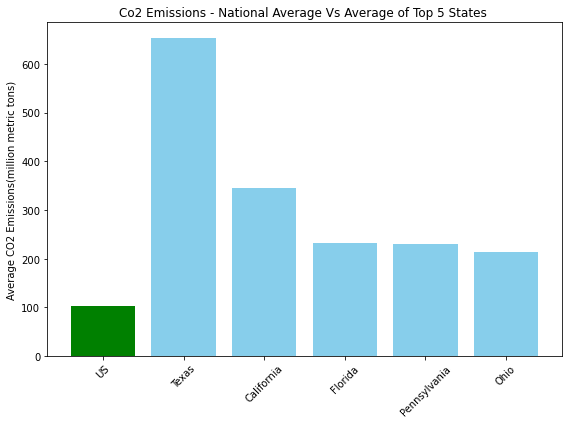

In [53]:
plt.figure(figsize=(8,6))
 #New_top_5_states_total = top_5_states_total[['Average CO2 Emissions']]
 #New_top_5_states_total.reset_index(inplace=True)
# Plot bar graph for 'US' vs 'Top 5 states CO2 Emissions'
plt.bar(avg_state_Co2['National'], avg_state_Co2['Average_total'], color='green')
plt.bar(top_5_states_total['State'], top_5_states_total['Average CO2 Emissions'], color='skyblue')

#plt.xlabel('State')
plt.ylabel('Average CO2 Emissions(million metric tons)')
plt.title('Co2 Emissions - National Average Vs Average of Top 5 States ')
plt.xticks(rotation=45)
#plt.yticks(range(0,6000,300))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/NationalvTop5_Average_Co2_Emissions.png")

#Show plot
plt.show()

In [26]:
# Converting the Sector wise tables to data frames 
Commercial_data = "data/commercial_mod.xlsx"
Commercial_emission = pd.read_excel(Commercial_data)
Electric_data = "data/electric_power_mod.xlsx"
Electric_emission = pd.read_excel(Electric_data)
Electric_emission_Average=pd.read_excel(Electric_data)
Industrial_data = "data/industrial_mod.xlsx"
Industrial_emission = pd.read_excel(Industrial_data)
Industrial_emission_Average= pd.read_excel(Industrial_data)
Residential_data = "data/residential_mod.xlsx"
Residential_emission = pd.read_excel(Residential_data)
Transportation_data = "data/transportation_mod.xlsx"
Transportation_emission = pd.read_excel(Transportation_data)
Transportation_emission_Average = pd.read_excel(Transportation_data)

#### Transportion  Sector Emissions

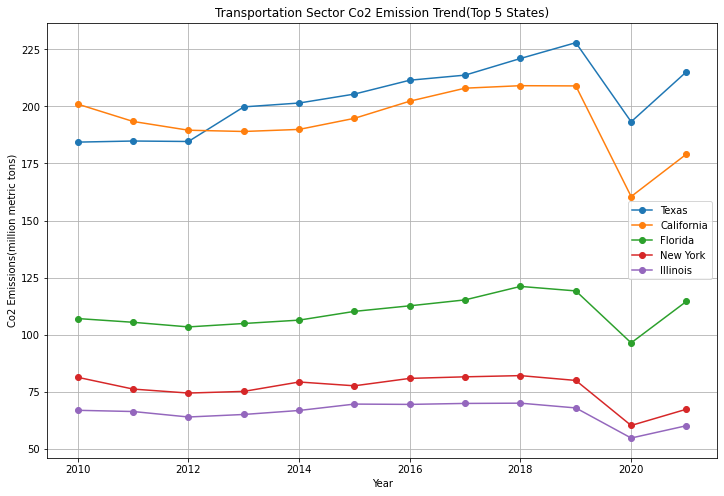

In [28]:
# Calculating total values for each state across the years

Transportation_emission_Average['Average'] = Transportation_emission_Average.iloc[:, 1:].mean(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Transport = Transportation_emission_Average.nlargest(5, 'Average')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Transport.iterrows():
    plt.plot(Transportation_emission_Average.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Transportation Sector Co2 Emission Trend(Top 5 States)')
plt.xlabel('Year')
plt.ylabel('Co2 Emissions(million metric tons)')
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig("output_data/Transport_Co2_Emissions.png")

#Show plot
plt.show()

In [24]:
#Merging the State Co2 and Transportation Sector Co2 dataframes
merged_Transport= pd.merge(Co2_emission,Transportation_emission, on='State', suffixes=('_total','_Transport'))
merged_Transport.head()

,State,2010_total,2011_total,2012_total,2013_total,2014_total,2015_total,2016_total,2017_total,2018_total,...,2012_Transport,2013_Transport,2014_Transport,2015_Transport,2016_Transport,2017_Transport,2018_Transport,2019_Transport,2020_Transport,2021_Transport
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,...,31.863088,31.389512,31.339742,32.336017,34.054544,33.677378,32.948357,33.843105,33.636080,37.164374
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,...,12.063227,10.958881,11.042541,11.741400,11.058813,11.233929,11.814073,11.871062,11.882899,13.650212
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,...,34.393504,34.846022,35.121628,35.670319,36.590066,36.870866,37.631665,38.678269,34.448114,38.450883
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,...,18.952333,18.780507,18.991542,18.798595,19.246891,19.414939,19.561396,19.742453,18.604547,19.536577
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,...,189.574377,189.022103,189.928139,194.785791,202.300961,208.002702,209.095071,208.991875,160.498681,179.117964


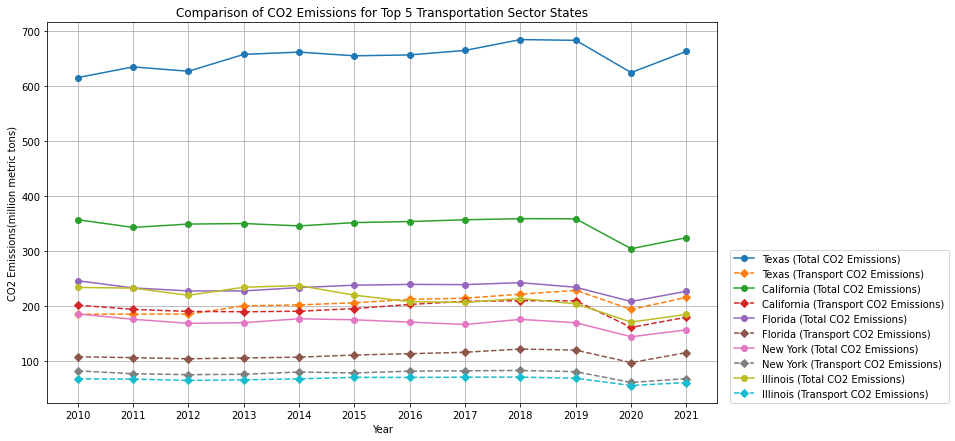

In [29]:
# List of years to analyze
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Plotting the trends of CO2 emissions for state_total and state_transport for the top 5 states in transport sector
plt.figure(figsize=(12,7))

for state in top_5_states_Transport['State']:
    row = merged_Transport[merged_Transport['State'] == state]
    plt.plot(years, row[[f"{year}_total" for year in years]].values.tolist()[0], label=f'{state} (Total CO2 Emissions)',marker ='o')
    plt.plot(years, row[[f"{year}_Transport" for year in years]].values.tolist()[0], label=f'{state} (Transport CO2 Emissions)', linestyle='dashed',marker='D')

plt.title('Comparison of CO2 Emissions for Top 5 Transportation Sector States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions(million metric tons)')
#plt.yticks(range(0,700,50))
plt.legend(loc=(1.02,0))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Transport_Trend_Top5_Co2_Emissions.png",dpi=300, bbox_inches='tight')

#Show plot
plt.show()

#### Electric Sector Co2 Emissions

In [19]:
Electric_emission.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,77.424433,74.610516,66.991328,64.734674,65.546672,62.362331,55.568695,50.988284,53.858463,48.465326,42.690066,47.204182
1,Alaska,3.044914,3.171587,3.133951,2.646773,2.912277,2.954859,2.759481,2.790627,2.694954,2.720353,2.735818,2.797984
2,Arizona,54.861659,52.776676,51.784736,55.180970,53.524856,50.043839,44.593824,43.837787,46.812692,43.530154,35.584387,34.329781
3,Arkansas,32.620870,34.545074,34.878959,35.872362,35.814198,27.268002,30.473228,32.068959,36.979227,31.218813,22.566543,28.541362
4,California,43.479505,36.442743,48.017084,45.683463,46.220060,44.142292,36.471191,32.898465,33.647991,31.119561,33.648911,35.345408


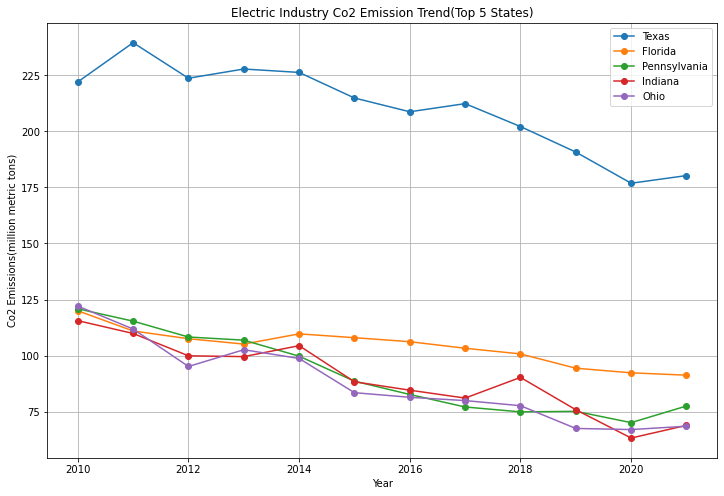

In [59]:
# Calculating total values for each state across the years

Electric_emission_Average['Average'] = Electric_emission_Average.iloc[:, 1:].mean(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Electric = Electric_emission_Average.nlargest(5, 'Average')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Electric.iterrows():
    plt.plot(Electric_emission_Average.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Electric Industry Co2 Emission Trend(Top 5 States)')
plt.xlabel('Year')
plt.ylabel('Co2 Emissions(million metric tons)')
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig("output_data/Electric_Co2_Emissions.png")

#Show plot
plt.show()

In [20]:
#Merging the State Co2 and Electric Sector Co2 dataframes
merged_Electric= pd.merge(Co2_emission,Electric_emission, on='State', suffixes=('_total','_Electric'))
merged_Electric.head()

,State,2010_total,2011_total,2012_total,2013_total,2014_total,2015_total,2016_total,2017_total,2018_total,...,2012_Electric,2013_Electric,2014_Electric,2015_Electric,2016_Electric,2017_Electric,2018_Electric,2019_Electric,2020_Electric,2021_Electric
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,...,66.991328,64.734674,65.546672,62.362331,55.568695,50.988284,53.858463,48.465326,42.690066,47.204182
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,...,3.133951,2.646773,2.912277,2.954859,2.759481,2.790627,2.694954,2.720353,2.735818,2.797984
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,...,51.784736,55.180970,53.524856,50.043839,44.593824,43.837787,46.812692,43.530154,35.584387,34.329781
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,...,34.878959,35.872362,35.814198,27.268002,30.473228,32.068959,36.979227,31.218813,22.566543,28.541362
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,...,48.017084,45.683463,46.220060,44.142292,36.471191,32.898465,33.647991,31.119561,33.648911,35.345408


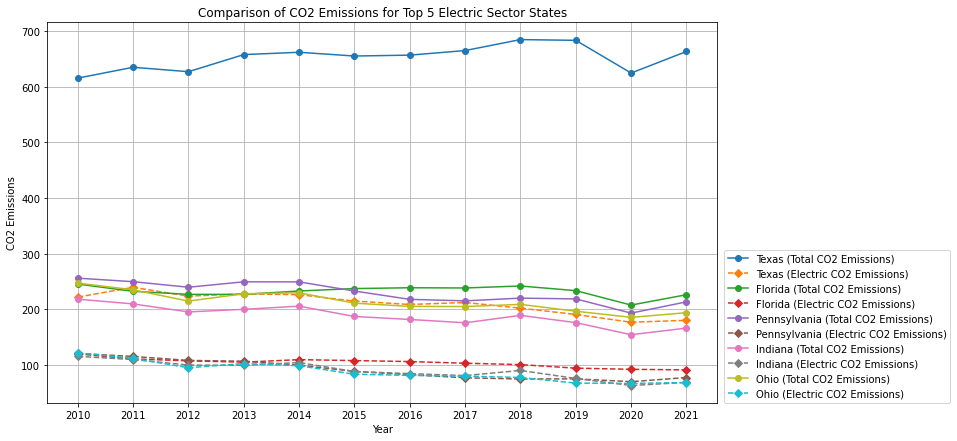

In [61]:
# List of years to analyze
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Plotting the trends of CO2 emissions for state_total and state_transport for the top 5 states in transport sector
#top_5_states_Electric = merged_Transport.nlargest(5,'2018_total')['State']
#top_5_transport_states = ['Texas','California']
plt.figure(figsize=(12,7))

for state in top_5_states_Electric['State']:
    row = merged_Electric[merged_Electric['State'] == state]
    plt.plot(years, row[[f"{year}_total" for year in years]].values.tolist()[0], label=f'{state} (Total CO2 Emissions)',marker ='o')
    plt.plot(years, row[[f"{year}_Electric" for year in years]].values.tolist()[0], label=f'{state} (Electric CO2 Emissions)', linestyle='dashed',marker='D')

plt.title('Comparison of CO2 Emissions for Top 5 Electric Sector States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
#plt.yticks(range(0,700,50))
plt.legend(loc=(1.01,0))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Electric_Trend_Top5_Co2_Emissions.png",dpi=300, bbox_inches='tight')

#Show plot
plt.show()

#### Industrial Sector Co2 Emissions

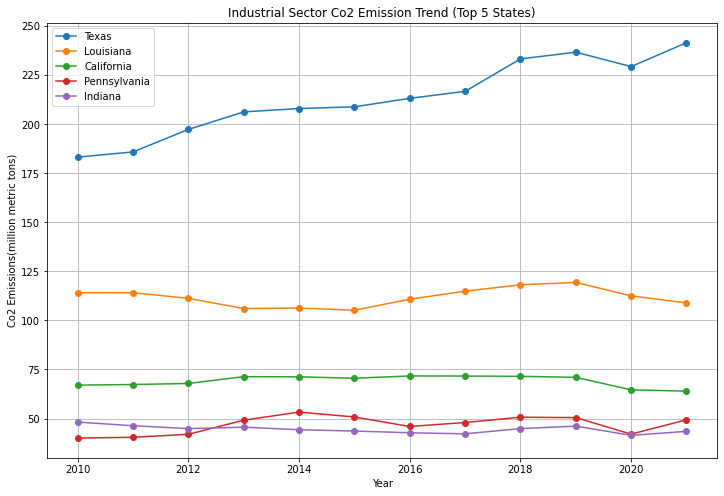

In [62]:
# Calculating total values for each state across the years

Industrial_emission_Average['Average'] =Industrial_emission_Average.iloc[:, 1:].mean(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Industrial = Industrial_emission_Average.nlargest(5, 'Average')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Industrial.iterrows():
    plt.plot(Industrial_emission_Average.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Industrial Sector Co2 Emission Trend (Top 5 States)')
plt.xlabel('Year')
plt.ylabel('Co2 Emissions(million metric tons)')
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig("output_data/Industrial_Co2_Emissions.png")

#Show plot
plt.show()

In [21]:
#Merging the State Co2 and Industrial Sector Co2 dataframes
merged_Industrial= pd.merge(Co2_emission,Industrial_emission, on='State', suffixes=('_total','_Industrial'))
merged_Industrial.head()

,State,2010_total,2011_total,2012_total,2013_total,2014_total,2015_total,2016_total,2017_total,2018_total,...,2012_Industrial,2013_Industrial,2014_Industrial,2015_Industrial,2016_Industrial,2017_Industrial,2018_Industrial,2019_Industrial,2020_Industrial,2021_Industrial
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,...,20.230121,20.312338,21.382837,20.212420,20.279392,20.081170,20.941644,19.669585,18.130391,19.640576
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,...,16.537205,16.464133,16.149340,16.162316,16.040915,15.983130,16.501765,16.224743,17.590190,18.390715
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,...,4.863010,4.510615,4.389844,4.246093,4.453082,4.807234,4.516673,4.640404,4.700587,4.625649
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,...,8.294386,8.825503,8.670703,7.842822,7.815212,8.093781,8.619798,8.530733,8.373307,8.281442
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,...,67.863514,71.335017,71.246487,70.533384,71.693901,71.641304,71.509330,70.973696,64.616502,63.945572


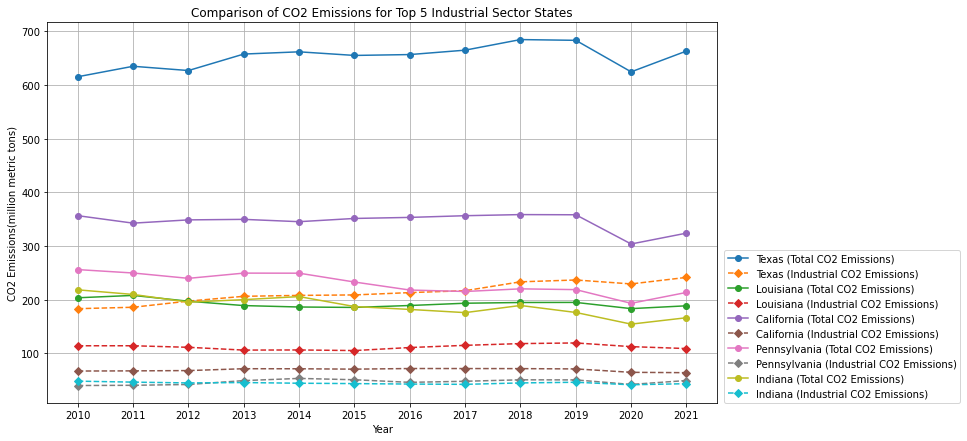

In [64]:
# List of years to analyze
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Plotting the trends of CO2 emissions for state_total and state_transport for the top 5 states in transport sector
#top_5_states_Electric = merged_Transport.nlargest(5,'2018_total')['State']
#top_5_transport_states = ['Texas','California']
plt.figure(figsize=(12,7))

for state in top_5_states_Industrial['State']:
    row = merged_Industrial[merged_Industrial['State'] == state]
    plt.plot(years, row[[f"{year}_total" for year in years]].values.tolist()[0], label=f'{state} (Total CO2 Emissions)',marker ='o')
    plt.plot(years, row[[f"{year}_Industrial" for year in years]].values.tolist()[0], label=f'{state} (Industrial CO2 Emissions)', linestyle='dashed',marker='D')

plt.title('Comparison of CO2 Emissions for Top 5 Industrial Sector States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions(million metric tons)')
plt.legend(loc=(1.01,0))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Trend_Top5Ind_Co2_Emissions.png",dpi=300, bbox_inches='tight')

#Show plot
plt.show()

#### Co2 Emissions - National Average(All sectors) Vs Average of Top 5 States(Industrial Sector)

In [22]:
merged_Industrial_Average= merged_Industrial
# Extracting column names for total and industrial
total_columns = [col for col in merged_Industrial.columns if col.endswith('_total')]
industrial_columns = [col for col in merged_Industrial.columns if col.endswith('_Industrial')]

# Calculate average total and average industrial
merged_Industrial_Average['Average_total'] = merged_Industrial[total_columns].mean(axis=1)
merged_Industrial_Average['Average_industrial'] = merged_Industrial[industrial_columns].mean(axis=1)

# Creating the new DataFrame with 'States', 'Average_total', and 'Average_industrial'
new_merged_industrial = merged_Industrial_Average[['State', 'Average_total', 'Average_industrial']]

new_merged_industrial.head()

,State,Average_total,Average_industrial
0,Alabama,116.248499,19.740667
1,Alaska,35.346155,16.504551
2,Arizona,92.947092,4.610158
3,Arkansas,64.603763,8.398874
4,California,345.762481,69.142247


In [66]:
average_total_avg= new_merged_industrial
# Calculate the average of all 'Average_total' values
average_total = average_total_avg['Average_total'].mean()
average_industrial = average_total_avg['Average_industrial'].mean()

# Create a new DataFrame for the 'State Average' row
state_average = pd.DataFrame({'National': ['US'], 'Average_total': [average_total], 'Average_Industrial': [average_industrial]})

# Append this new row to the existing DataFrame
#df = df.append(state_average_row, ignore_index=True)
state_average.head()


,National,Average_total,Average_Industrial
0,US,102.279655,18.819512


In [67]:
Avg_top_5_Industrial = new_merged_industrial.nlargest(5, 'Average_industrial')
Avg_top_5_Industrial.head(50)

,State,Average_total,Average_industrial
43,Texas,652.591748,213.384573
18,Louisiana,192.819734,111.810807
4,California,345.762481,69.142247
38,Pennsylvania,229.706446,46.839685
14,Indiana,188.384065,44.464749


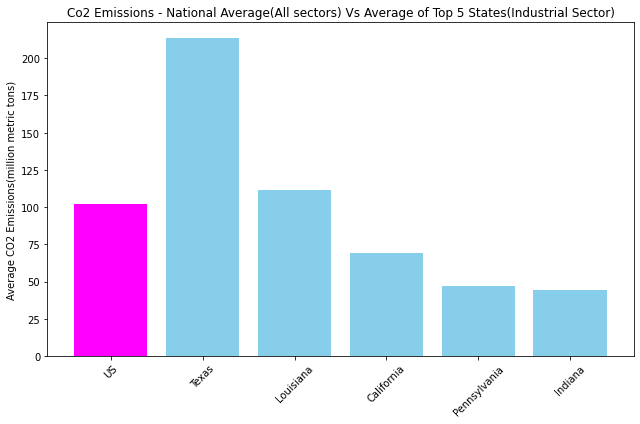

In [68]:
plt.figure(figsize=(9, 6))

# Plot bar graph for 'US' vs 'Top 5 states CO2 Emissions'
plt.bar(state_average['National'], state_average['Average_total'], color='magenta')
plt.bar(Avg_top_5_Industrial['State'], Avg_top_5_Industrial['Average_industrial'], color='skyblue')
#plt.xlabel('State')
plt.ylabel('Average CO2 Emissions(million metric tons)')
plt.title('Co2 Emissions - National Average(All sectors) Vs Average of Top 5 States(Industrial Sector)')
plt.xticks(rotation=45)
#plt.yticks(range(0,6000,300))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/NationalvTop5Industrial_Average_Co2_Emissions.png")

#Show plot
plt.show()

#### Comparison of Sectorwise CO2 Emissions for a State

In [69]:
merged_sectors= pd.merge(Transportation_emission,Industrial_emission, on='State', suffixes=('_Transportation','_Industrial'))
merged_sectors_2= pd.merge(Electric_emission,Commercial_emission, on='State', suffixes=('_Electric','_Commercial'))
merged_sectors= pd.merge(merged_sectors,merged_sectors_2, on='State')
merged_sectors.head()

,State,2010_Transportation,2011_Transportation,2012_Transportation,2013_Transportation,2014_Transportation,2015_Transportation,2016_Transportation,2017_Transportation,2018_Transportation,...,2012_Commercial,2013_Commercial,2014_Commercial,2015_Commercial,2016_Commercial,2017_Commercial,2018_Commercial,2019_Commercial,2020_Commercial,2021_Commercial
0,Alabama,32.256336,32.333341,31.863088,31.389512,31.339742,32.336017,34.054544,33.677378,32.948357,...,1.786784,1.836465,1.933392,2.162168,2.216571,2.109312,2.352970,2.229468,2.072646,2.332216
1,Alaska,13.918656,13.309713,12.063227,10.958881,11.042541,11.741400,11.058813,11.233929,11.814073,...,2.658865,2.421547,2.354387,2.584399,2.046540,2.062429,2.043495,2.014915,2.117089,2.303515
2,Arizona,35.322818,35.121212,34.393504,34.846022,35.121628,35.670319,36.590066,36.870866,37.631665,...,2.321155,2.361908,2.229531,2.894365,3.035744,2.900570,2.892804,3.061001,2.846283,3.116109
3,Arkansas,19.808194,19.608548,18.952333,18.780507,18.991542,18.798595,19.246891,19.414939,19.561396,...,2.483742,2.820765,3.079219,3.105793,2.931116,3.029643,3.494563,3.515042,3.315649,3.598295
4,California,201.006805,193.414932,189.574377,189.022103,189.928139,194.785791,202.300961,208.002702,209.095071,...,15.947723,15.968061,15.087112,18.573515,18.831954,18.934092,19.600161,20.060948,18.419568,19.449032


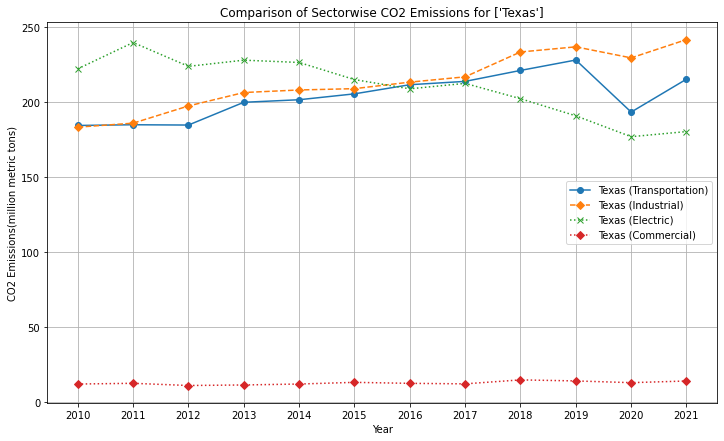

In [70]:
# List of years to analyze
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
state_list = ["Texas"]
# Plotting the trends of CO2 emissions for state_total and state_transport for the top 5 states in transport sector

plt.figure(figsize=(12,7))

for state in state_list:
    row = merged_sectors[merged_sectors['State'] == state]
    plt.plot(years, row[[f"{year}_Transportation" for year in years]].values.tolist()[0], label=f'{state} (Transportation)',marker ='o')
    plt.plot(years, row[[f"{year}_Industrial" for year in years]].values.tolist()[0], label=f'{state} (Industrial)', linestyle='dashed',marker='D')
    plt.plot(years, row[[f"{year}_Electric" for year in years]].values.tolist()[0], label=f'{state} (Electric)', linestyle='dotted',marker='x')
    plt.plot(years, row[[f"{year}_Commercial" for year in years]].values.tolist()[0], label=f'{state} (Commercial)', linestyle='dotted',marker='D')
plt.plot()
plt.title(f'Comparison of Sectorwise CO2 Emissions for {state_list}')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions(million metric tons)')
plt.legend(loc='center right')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Sectorwise_comparison(Texas).png")

#Show plot
plt.show()